In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-04-29 17:24:22.992064: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 17:24:23.055673: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-29 17:24:24.051867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/home/orbo/pushkar/Classification/training /train_1/train",
    # la/bels="inferred",         # infer from folder names
    # label_mode="binary",       # for gender classification
    image_size=(224, 224),     # resize all images to same size
    batch_size=32,
    # validation_split=0.2,
    # subset="training",
    # seed=42
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/home/orbo/pushkar/Classification/training /train_1/valid",
    # labels="inferred",
    # label_mode="binary",
    image_size=(224, 224),
    batch_size=32,
    # validation_split=0.2,
    # subset="validation",
    # seed=42
)

Found 2000 files belonging to 2 classes.


Found 400 files belonging to 2 classes.


In [4]:

class_names = train_dataset.class_names
print(class_names)

['female', 'male']


2025-04-29 17:24:52.283449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


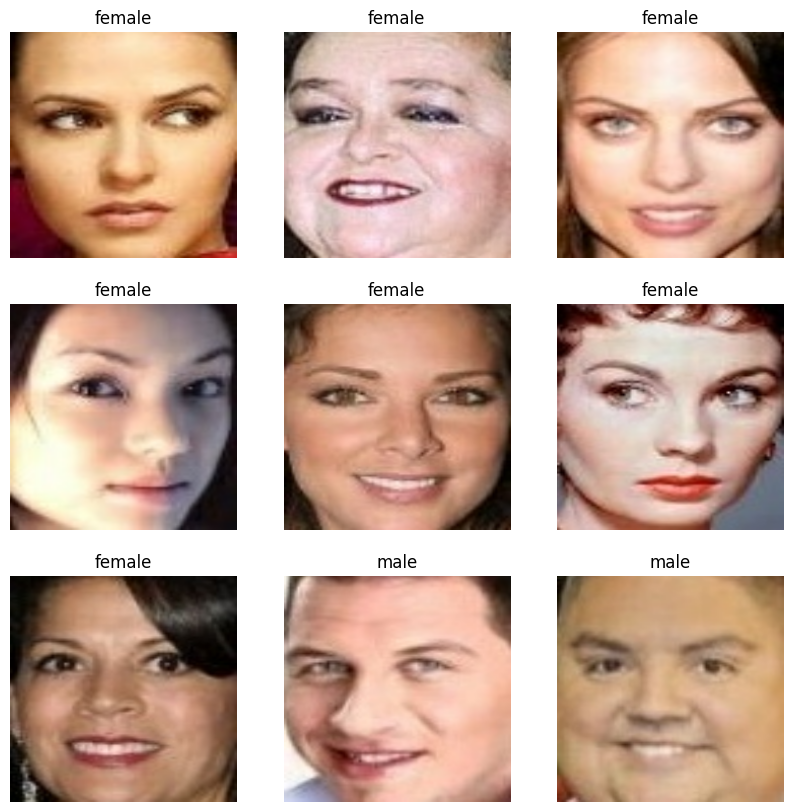

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Let's say `train_ds` is your loaded dataset
class_names = train_dataset.class_names  # ['female', 'male']

# Show first batch
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = int(labels[i])
        plt.title(class_names[label_index])
        plt.axis("off")



In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_dataset.map(lambda x, y: (normalization_layer(x), y))

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [8]:
print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val batches:", tf.data.experimental.cardinality(val_ds).numpy())

Train batches: 63
Val batches: 13


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 without top layers
base_model = ResNet50(input_shape=(224, 224, 3),
                      include_top=False,
                      weights='imagenet')

# Freeze the convolutional base
base_model.trainable = True

# Add custom classifier
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Instead of Flatten(), better for ResNet
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=80
)

Epoch 1/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 562ms/step - accuracy: 0.7956 - loss: 0.4930 - val_accuracy: 0.5000 - val_loss: 2.7480
Epoch 2/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9119 - loss: 0.2395 - val_accuracy: 0.5000 - val_loss: 531.7222
Epoch 3/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9468 - loss: 0.1569 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 4/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9400 - loss: 0.1564 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 5/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9644 - loss: 0.0962 - val_accuracy: 0.5000 - val_loss: 2.2333
Epoch 6/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9787 - loss: 0.0591 - val_accuracy: 0.5000 - val_loss: 0.8455
Epoch 7/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9722 - loss: 0.0860 - val_accuracy: 0.5000 - val_loss: 1.8346
Epoch 8/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9561 - loss: 0.1005 - val_accuracy: 0.5000

In [20]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

 7/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9250 - loss: 1.0469

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9253 - loss: 0.8610
Validation Accuracy: 92.75%


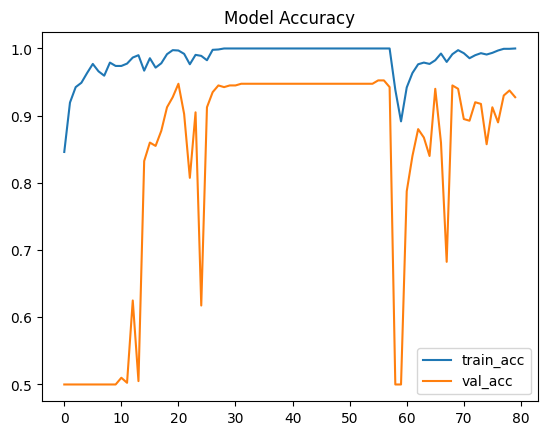

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [22]:
model.save("gggender_classifier_model.h5")

In [23]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9121 - loss: 0.6761

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9149 - loss: 0.7941
Validation Accuracy: 92.75%


In [28]:

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('gggender_classifier_model.h5')  # or .keras if that's what you used


# Parameters (should match training)
img_height = 224
img_width = 224
class_names = ['Female', 'Male']  # Adjust based on your label encoding

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if you did so during training
    return img_array

img_path = '/home/orbo/pushkar/Classification/training /testing/131486.jpg.jpg'
processed_img = preprocess_image(img_path)

# Predict
print("image shape ", processed_img.shape)
predictions = model.predict(processed_img)

# If using `binary_crossentropy` with 1 output neuron (sigmoid):
# gender = 'Male' if predictions[0][0] > 0.5 else 'Female'
predicted_class = np.argmax(predictions, axis=1)[0]

gender = class_names[predicted_class]

print(f"Predicted Gender: {gender}")


image shape  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Gender: Female


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Gender: Female


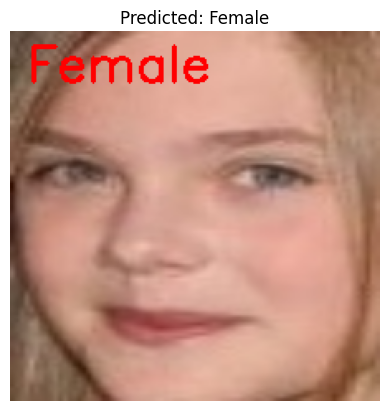

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2

# Load the trained model
model = load_model('gggender_classifier_model.h5')

# Parameters
img_height = 224
img_width = 224
class_names = ['Female', 'Male']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Load and preprocess image
img_path = '/home/orbo/pushkar/Classification/training /testing/131486.jpg.jpg'
processed_img = preprocess_image(img_path)

# Predict
predictions = model.predict(processed_img)
predicted_class = np.argmax(predictions, axis=1)[0]
gender = class_names[predicted_class]
print(f"Predicted Gender: {gender}")

# Load original image (for visualization)
original_img = cv2.imread(img_path)
original_img = cv2.resize(original_img, (img_width, img_height))
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Add text on image
cv2.putText(original_img_rgb, gender, (10, 30),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1, color=(255, 0, 0), thickness=2)

# Show image with predicted label
plt.imshow(original_img_rgb)
plt.title(f"Predicted: {gender}")
plt.axis('off')
plt.show()
